In [1]:
import os 
os.chdir("../")
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sde.sde_class import sde_class

In [2]:
sde = sde_class(T=1, N=10000, M=1000)
def mu_fun(x):
    return 2 * x
def sigma_fun(x):
    return x
R_seq = np.array([1,2,4,8,16,32,64,128])
X_dict = {}
for R in R_seq:
    X = sde.euler_maruyama(mu_fun=mu_fun,
                           sigma_fun=sigma_fun,
                           x0=1,
                           R=R)
    X_dict[R] = X

100%|██████████| 78/78 [00:00<00:00, 25317.73it/s]


In [3]:
error_df = []
for R in X_dict:
    rows = [[err, R] for err in np.abs(X_dict[R][:,-1] - \
            np.exp((2-0.5) + sde.W[:,-1]))]
    error_df += rows
error_df = pd.DataFrame(error_df, columns=["Error", "R"])

In [4]:
log_err = np.log(error_df.groupby(['R'])['Error'].mean().values)
m, b = np.polyfit(np.log(sde.dt * R_seq), log_err,1)

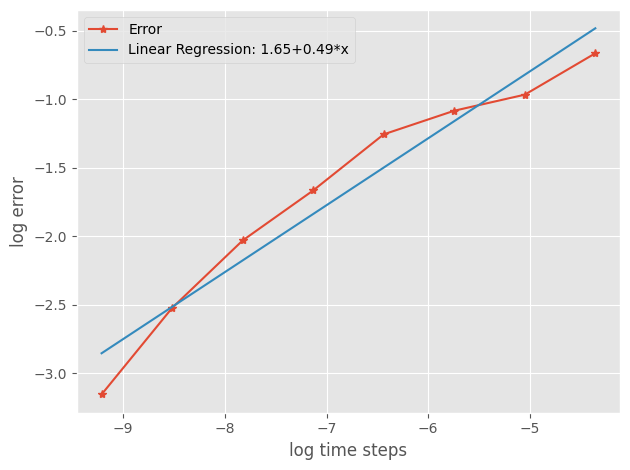

In [5]:
plt.style.use('ggplot')
plt.plot(np.log(sde.dt * R_seq), 
         log_err, marker="*",
         label="Error")
plt.plot(np.log(sde.dt * R_seq), 
         m*np.log(sde.dt * R_seq)+b,
         label="Linear Regression: "+
         str(np.round(b,2)) + 
         "+" + str(np.round(m,2))+"*x")
plt.xlabel("log time steps")
plt.ylabel("log error")
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# Milstein 

In [6]:
sde = sde_class(T=1, N=10000, M=1000)
def mu_fun(x):
    return 2 * x
def sigma_fun(x):
    return x
def d_sigma_fun(x):
    return 1
R_seq = np.array([1,2,4,8,16,32])
X_dict = {}
for R in R_seq:
    X = sde.milstein(mu_fun=mu_fun,
                    sigma_fun=sigma_fun,
                    d_sigma_fun=d_sigma_fun,
                    x0=1,
                    R=R)
    X_dict[R] = X

100%|██████████| 312/312 [00:00<00:00, 19434.51it/s]


In [7]:
error_df = []
for R in X_dict:
    rows = [[err, R] for err in np.abs(X_dict[R][:,-1] - \
            np.exp((2-0.5) + sde.W[:,-1]))]
    error_df += rows
error_df = pd.DataFrame(error_df, columns=["Error", "R"])

In [8]:
log_err = np.log(error_df.groupby(['R'])['Error'].mean().values)
m,b = np.polyfit(np.log(sde.dt * R_seq), log_err,1)

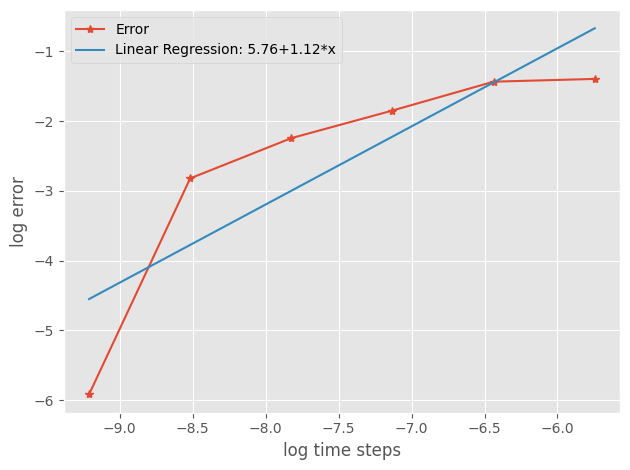

In [9]:
plt.style.use('ggplot')
plt.plot(np.log(sde.dt * R_seq), 
         log_err, marker="*",
         label="Error")
plt.plot(np.log(sde.dt * R_seq), 
         m*np.log(sde.dt * R_seq)+b,
         label="Linear Regression: "+
         str(np.round(b,2)) + 
         "+" + str(np.round(m,2))+"*x")
plt.xlabel("log time steps")
plt.ylabel("log error")
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# Weak convergence 

In [10]:
def mu_fun(x):
    return 2 * x
def sigma_fun(x):
    return 0.1*x
R_seq = np.array([1,2,4,8,16,32,64,128])
EX = np.zeros(len(R_seq))
for i, R in enumerate(R_seq):
    sde = sde_class(T=1, N=1000, M=5000)
    X = sde.euler_maruyama(mu_fun=mu_fun,
                           sigma_fun=sigma_fun,
                           x0=1,
                           R=R)
    EX[i] = np.mean(X[:,-1])
    

100%|██████████| 7/7 [00:00<00:00, 4851.31it/s]


In [11]:
m, b = np.polyfit(np.log(sde.dt * R_seq), 
                np.log(np.abs(EX-np.exp(2))),1)

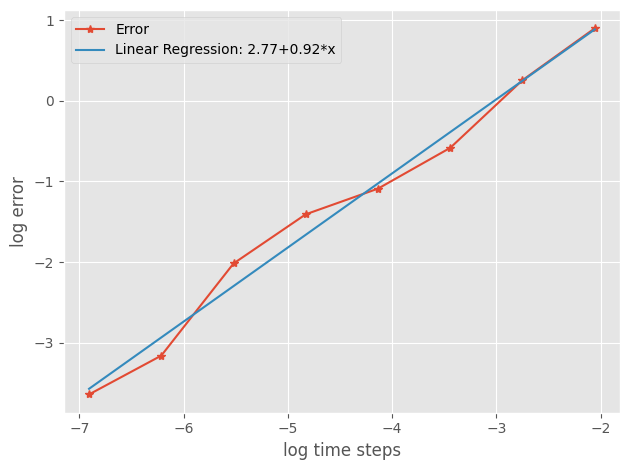

In [12]:
plt.style.use('ggplot')
plt.plot(np.log(sde.dt * R_seq), 
         np.log(np.abs(EX-np.exp(2))), marker="*",
         label="Error")
plt.plot(np.log(sde.dt * R_seq), 
         m*np.log(sde.dt * R_seq)+b,
         label="Linear Regression: "+
         str(np.round(b,2)) + 
         "+" + str(np.round(m,2))+"*x")
plt.xlabel("log time steps")
plt.ylabel("log error")
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# Linear stability 

In [16]:
sde = sde_class(T=20, N=80, M=50000)

In [17]:
def mu_fun(x):
    return -3 * x
def sigma_fun(x):
    return np.sqrt(3)*x
R_seq = np.array([1,2,4])
X_dict = {}
for R in R_seq:
    X = sde.euler_maruyama(mu_fun=mu_fun,
                           sigma_fun=sigma_fun,
                           x0=1,
                           R=R)
    X_dict[R] = X


100%|██████████| 19/19 [00:00<00:00, 312.49it/s]


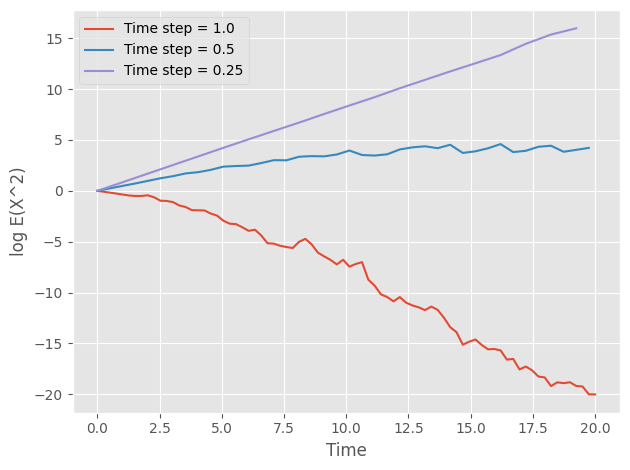

In [19]:
for R in X_dict:
    plt.plot(sde.time[::R],
             np.log10(np.mean(X_dict[R]**2, axis=0)),
             label="Time step = "+str(1/R))
plt.xlabel("Time")
plt.ylabel("log E(X^2)")
plt.tight_layout()
plt.legend()
plt.show()

In [20]:
sde = sde_class(T=500, N=2000, M=1)
def mu_fun(x):
    return 0.5 * x
def sigma_fun(x):
    return np.sqrt(6)*x
R_seq = np.array([1,2,4])
X_dict = {}
for R in R_seq:
    X = sde.euler_maruyama(mu_fun=mu_fun,
                           sigma_fun=sigma_fun,
                           x0=1,
                           R=R)
    X_dict[R] = X


100%|██████████| 499/499 [00:00<00:00, 32168.67it/s]


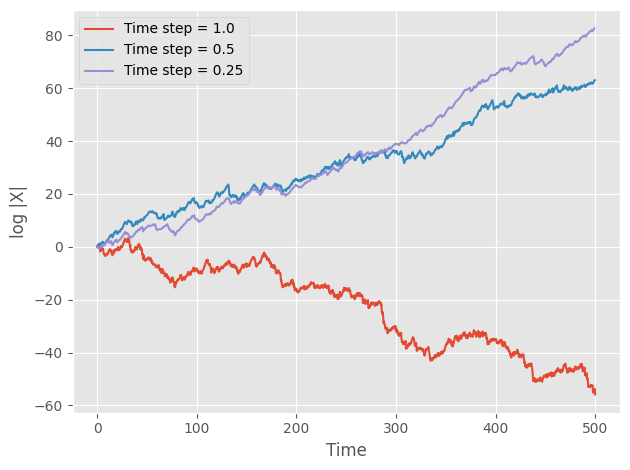

In [22]:
for R in X_dict:
    plt.plot(sde.time[::R],
             np.log10(np.abs(X_dict[R][0,:])),
             label="Time step = "+str(1/R))
plt.xlabel("Time")
plt.ylabel("log |X|")
plt.tight_layout()
plt.legend()
plt.show()